gen	nevals	avg     	std    	min	max
0  	300   	-19.6933	14.6258	-28	36 
1  	181   	-22.56  	12.8691	-28	36 
2  	173   	-24.52  	11.0732	-28	36 
3  	164   	-25.8367	9.43592	-28	27 
4  	188   	-26.24  	8.45236	-28	27 
5  	165   	-27.06  	6.42   	-28	27 
6  	181   	-25.12  	11.7012	-28	31 
7  	186   	-25.98  	9.49243	-28	27 
8  	163   	-25.1233	11.2905	-28	27 
9  	197   	-27.1433	5.63999	-28	27 
10 	181   	-27.08  	5.70908	-28	27 
11 	185   	-25.5633	10.415 	-28	27 
12 	194   	-25.19  	11.625 	-28	27 
13 	174   	-25.5133	11.025 	-28	36 
14 	199   	-25.2967	11.231 	-28	27 
15 	170   	-25.53  	10.8312	-28	27 
16 	172   	-26.3567	8.42829	-28	27 
17 	189   	-24.94  	12.0243	-28	27 
18 	173   	-25.2633	11.4659	-28	36 
19 	188   	-25     	11.655 	-28	27 
20 	169   	-26.0133	9.45585	-28	27 
21 	186   	-26.3   	7.91602	-28	27 
22 	162   	-27.24  	4.78077	-28	27 
23 	187   	-26.4867	7.87463	-28	27 
24 	189   	-26.4733	8.40333	-28	27 
25 	180   	-26.2533	8.94888	-28	27 
26 	186   	-26.4267	8.59174	

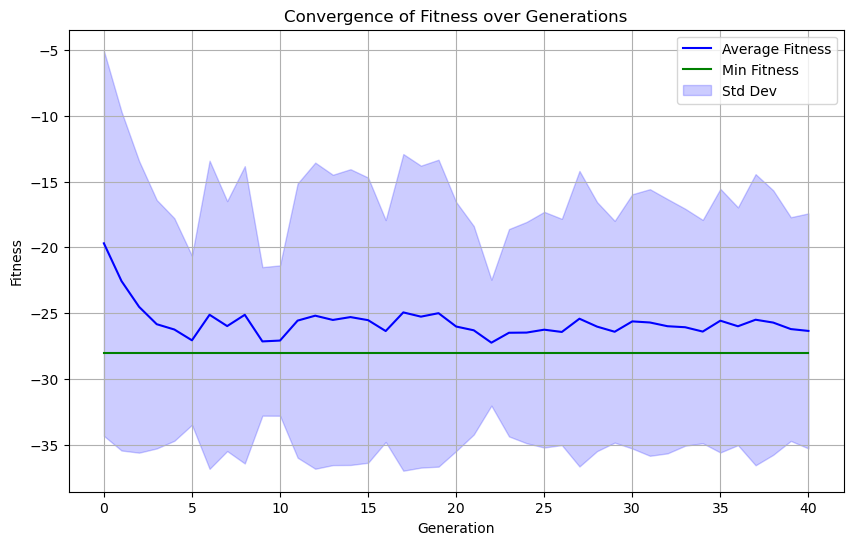

Best Individual: [0, 0, 0, 0]
Best Fitness: -28.0


In [55]:
import random
from deap import base, creator, tools, algorithms
import numpy as np
import matplotlib.pyplot as plt
import random

# 定义适应度函数和个体
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

# 定义供应商和流程相关的参数
defect_rate_1 = [0.1, 0.2, 0.1, 0.2, 0.1, 0.5]#次品率
purchase_cost_1 = [4, 4, 4, 4, 4, 4]#购买单价
inspection_cost_1 = [2, 2, 2, 1, 8, 2]#检测成本

defect_rate_2 = [0.1, 0.2, 0.1, 0.2, 0.2, 0.05]#次品率
purchase_cost_2 = [18, 18, 18, 18, 18, 18]#购买单价
inspection_cost_2 = [3, 3, 3, 1, 1, 3]#检测成本

assembly_cost = [6, 6, 6, 6, 6, 6]#装配成本
inspection_cost_final = [3, 3, 3, 2, 2, 3]#检测成本
market_price = [56, 56, 56, 56, 56, 56]#市场售价
replacement_loss = [6, 6, 30, 30, 10, 10]#调换损失
disassembly_cost = [5, 5, 5, 5, 5, 40]#拆解费用
length = len(defect_rate_1)

# 定义适应度函数
def eval_solution(individual):
    x1, x2, y, z = individual
    cost_purchase_1, cost_purchase_2, cost_inspection_1, cost_inspection_2, cost_assembly = 0, 0, 0, 0, 0
    # 采购成本（无论是否检验都要支付）
    cost_purchase_1 += purchase_cost_1[5]
    cost_purchase_2 += purchase_cost_2[5]

    # 检验成本
    cost_inspection_1 += x1 * inspection_cost_1[5]  # 是否选择检验供应商1的产品
    cost_inspection_2 += x2 * inspection_cost_2[5]  # 是否选择检验供应商2的产品

    # 装配成本
    cost_assembly += assembly_cost[5]  # 固定的装配成本
    cost_inspection_final = 0
    # 固定的最终缺陷率（设为0.1）
    defect_rate_final_effective = [0.1, 0.2, 0.1, 0.2, 0.1, 0.05]

    # 初始市场成本
    cost_market = 0
    replacement_cost = 0
    disassembly_cost_final = 0

    # 如果未进行最终检验，默认所有产品都存在缺陷
    if y == 0:
        cost_market += market_price[5]
        k = random.random()
        if k > 0.9:
            replacement_cost += replacement_loss[5]
            disassembly_cost_final += z * disassembly_cost[5]
            if z == 0:
                pass
            elif z == 1:
                if x1 == 1:
                    pass
                elif x1 == 0:
                    cost_inspection_1 += inspection_cost_1[5]
                if x2 == 1:
                    pass
                elif x2 == 0:
                    cost_inspection_2 += inspection_cost_2[5]
        else:
            pass
    elif y == 1:
        cost_inspection_final += y * inspection_cost_final[5]
        j = random.random()
        if j > 0.9:
            if z == 0:
                pass
            elif z == 1:
                if x1 == 1:
                    pass
                elif x1 == 0:
                    cost_inspection_1 += inspection_cost_1[5]
                if x2 == 1:
                    pass
                elif x2 == 0:
                    cost_inspection_2 += inspection_cost_2[5]
        else:
            cost_market += market_price[5]
    # 计算总成本
    total_cost = (cost_purchase_1 + cost_purchase_2 +
            cost_inspection_1 + cost_inspection_2 + 
            cost_assembly + cost_inspection_final + 
            replacement_cost + disassembly_cost_final - cost_market)

    return total_cost,

# 初始化遗传算法工具箱
toolbox = base.Toolbox()
toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, 4)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", eval_solution)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

# 遗传算法主函数
def main():
    random.seed(64)
    pop = toolbox.population(n=300)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)

    # 运行遗传算法并获取日志
    pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=40, 
                                   stats=stats, halloffame=hof, verbose=True)
    
    # 提取日志数据
    gen = log.select("gen")      # 每一代的编号
    avg = log.select("avg")      # 每一代的平均适应度值
    std = log.select("std")      # 每一代的适应度标准差
    min_ = log.select("min")     # 每一代的最小适应度值
    max_ = log.select("max")     # 每一代的最大适应度值
    
    # 绘制收敛图
    plt.figure(figsize=(10, 6))
    plt.plot(gen, avg, label="Average Fitness", color="blue")
    plt.plot(gen, min_, label="Min Fitness", color="green")
    plt.fill_between(gen, np.array(avg) - np.array(std), np.array(avg) + np.array(std),
                     color="blue", alpha=0.2, label="Std Dev")
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.title("Convergence of Fitness over Generations")
    plt.legend()
    plt.grid(True)
    plt.show()

    return pop, log, hof

# 主程序入口
if __name__ == "__main__":
    pop, log, hof = main()
    best_individual = hof.items[0]
    print("Best Individual:", best_individual)
    print("Best Fitness:", best_individual.fitness.values[0])
